# EC7212 - Computer Vision and Image Processing
## Assignment 2 - Task 1: Otsu's Thresholding with Gaussian Noise

Author: **Ekanayaka S.A.N.D.**

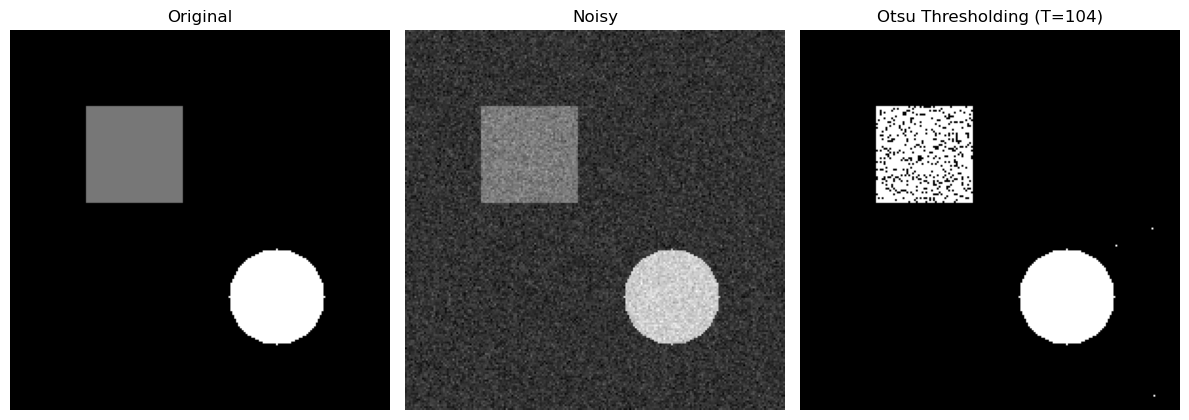

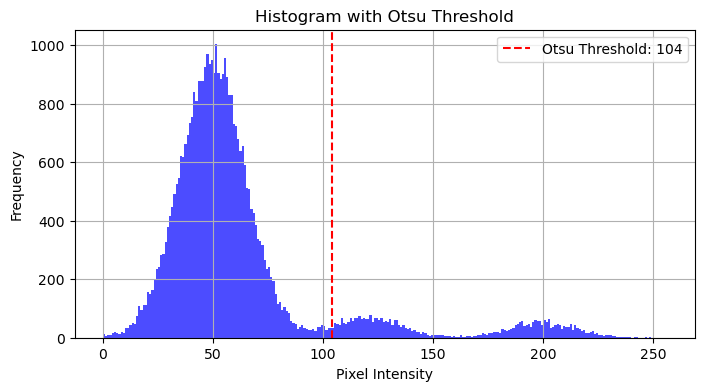

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Create output folder
output_dir = "task1_results"
os.makedirs(output_dir, exist_ok=True)

# Step 1: Create synthetic grayscale image with 3 regions
def create_three_region_image(size=(200, 200)):
    image = np.ones(size, dtype=np.uint8) * 50  # Background

    cv2.rectangle(image, (40, 40), (90, 90), 120, -1)  # Object 1
    cv2.circle(image, (140, 140), 25, 200, -1)         # Object 2

    return image

# Step 2: Add Gaussian noise
def add_gaussian_noise(image, mean=0, std=15):
    noise = np.random.normal(mean, std, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Step 3: Implement Otsu's Thresholding manually
def otsu_threshold(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    total_pixels = image.size
    current_max, threshold = 0, 0
    sum_total = np.dot(np.arange(256), hist)

    sumB, wB = 0, 0

    for t in range(256):
        wB += hist[t]
        if wB == 0:
            continue

        wF = total_pixels - wB
        if wF == 0:
            break

        sumB += t * hist[t]
        mB = sumB / wB
        mF = (sum_total - sumB) / wF

        between_var = wB * wF * (mB - mF) ** 2

        if between_var > current_max:
            current_max = between_var
            threshold = t

    return threshold

# Step 4: Run full pipeline
original = create_three_region_image()
noisy = add_gaussian_noise(original)
thresh_value = otsu_threshold(noisy)
_, otsu_result = cv2.threshold(noisy, thresh_value, 255, cv2.THRESH_BINARY)

# Step 5: Save and display results
cv2.imwrite(os.path.join(output_dir, "original.png"), original)
cv2.imwrite(os.path.join(output_dir, "noisy.png"), noisy)
cv2.imwrite(os.path.join(output_dir, "otsu_result.png"), otsu_result)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(original, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noisy")
plt.imshow(noisy, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Otsu Thresholding (T={thresh_value})")
plt.imshow(otsu_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "summary.png"))
plt.show()

# Histogram
plt.figure(figsize=(8, 4))
plt.hist(noisy.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.axvline(thresh_value, color='red', linestyle='dashed', label=f'Otsu Threshold: {thresh_value}')
plt.title("Histogram with Otsu Threshold")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.savefig(os.path.join(output_dir, "histogram.png"))
plt.show()


## Assignment 2 - Task 2: Region Growing Segmentation

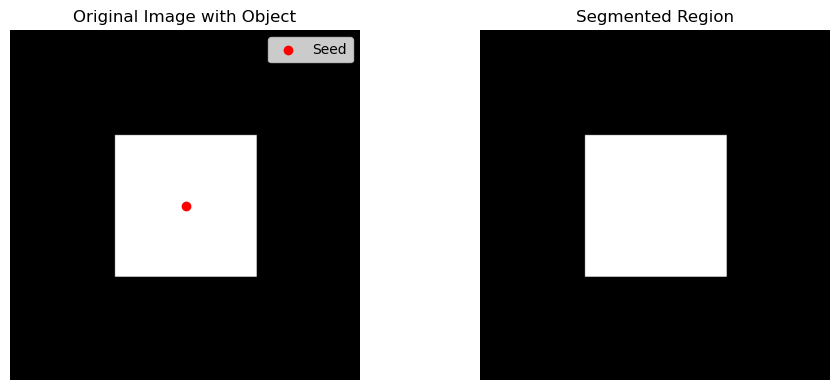

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from collections import deque

# Create output folder
output_dir = "task2_results"
os.makedirs(output_dir, exist_ok=True)

# Step 1: Create an image with simple foreground and background
def create_synthetic_image(size=(200, 200)):
    img = np.ones(size, dtype=np.uint8) * 50  # Background
    cv2.rectangle(img, (60, 60), (140, 140), 150, -1)  # Foreground object
    return img

# Step 2: Region Growing Algorithm
def region_growing(image, seed, threshold=10):
    height, width = image.shape
    visited = np.zeros_like(image, dtype=bool)
    segmented = np.zeros_like(image, dtype=np.uint8)

    seed_value = image[seed]
    queue = deque([seed])

    while queue:
        x, y = queue.popleft()
        if visited[x, y]:
            continue

        visited[x, y] = True
        if abs(int(image[x, y]) - int(seed_value)) <= threshold:
            segmented[x, y] = 255
            # Explore 4-connected neighbors
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < height and 0 <= ny < width:
                    if not visited[nx, ny]:
                        queue.append((nx, ny))
    return segmented

# Step 3: Run full pipeline
original = create_synthetic_image()
seed_point = (100, 100)
segmented = region_growing(original, seed=seed_point, threshold=10)

# Save results
cv2.imwrite(os.path.join(output_dir, "original.png"), original)
cv2.imwrite(os.path.join(output_dir, "segmented.png"), segmented)

# Visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image with Object")
plt.imshow(original, cmap='gray')
plt.scatter(seed_point[1], seed_point[0], color='red', label='Seed')
plt.legend()
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmented Region")
plt.imshow(segmented, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "summary.png"))
plt.show()
